In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
import statsmodels.api as sm
plt.style.use('mycustomstyle')

%matplotlib inline

**Boston Dataset**

CRIM: Per capita crime rate by town <br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft <br>
INDUS: Proportion of non-retail business acres per town <br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
NOX: Nitric oxide concentration (parts per 10 million) <br>
RM: Average number of rooms per dwelling <br>
AGE: Proportion of owner-occupied units built prior to 1940 <br>
DIS: Weighted distances to five Boston employment centers <br>
RAD: Index of accessibility to radial highways <br>
TAX: Full-value property tax rate per USD10,000 <br> 
PTRATIO: Pupil-teacher ratio by town <br>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town <br>
LSTAT: Percentage of lower status of the population <br>
MEDV: Median value of owner-occupied homes in $1000s <br>

In [168]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
X = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df['target'] = boston_dataset.target
Y=df['target']

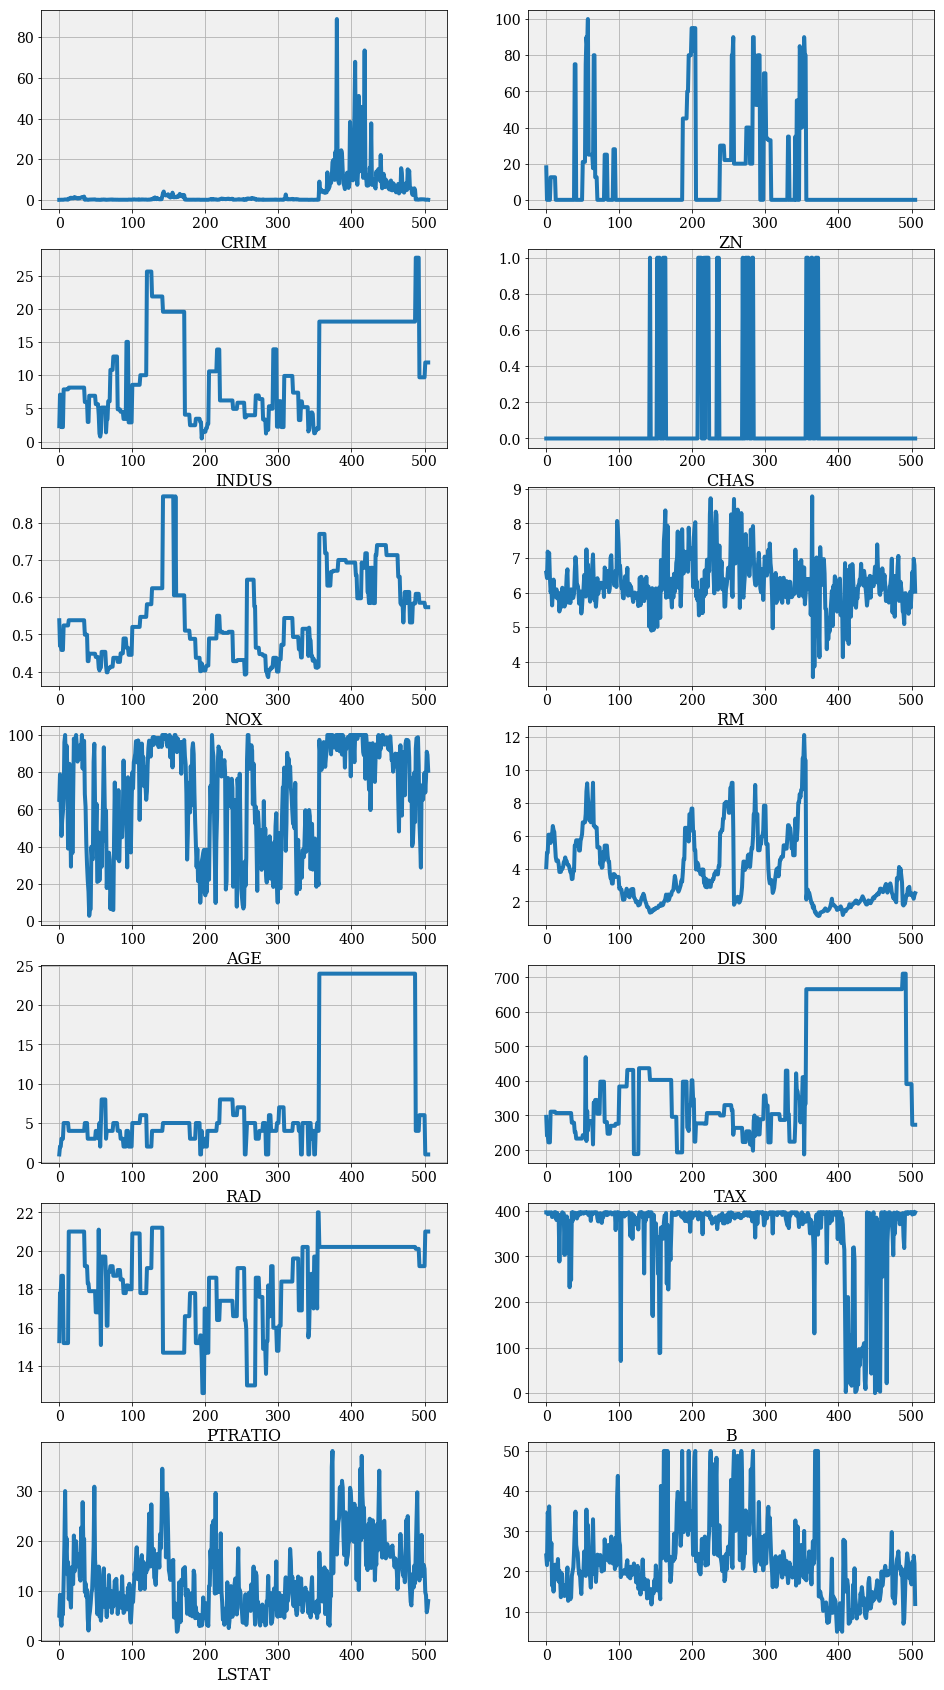

In [152]:
# Looking at Data
plt.figure(figsize =(16,30))
c=1
for i in X:
    plt.subplot(7,2,c)
    plt.plot(X[i])
    plt.xlabel(i)
    c+=1
plt.subplot(7,2,14)
plt.plot(Y)

# Observations:
- High Crime rate is associated with low prices
- Industrial and Nitrogen oxide are correlated (check Correlation)
- High accessibility to radial road is related to high crime and thus to low house price. (Check correlation)


In [153]:
df['logCrim']=np.log(df['CRIM'])
np.abs(df.corr())>0.8

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,logCrim
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
NOX,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
DIS,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
TAX,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True


**Correlated variables (Corr>0.8)**
- TAX, RAD, log(Crime)

**Highly correlated variable (Corr>0.9)**
- TAX, RAD

In [163]:
# Exploring TAX, RAD correlation
df1 = df[['TAX','RAD']].loc[(df['RAD']!=24)]
df1.corr()

,TAX,RAD
TAX,1.000000,0.188256
RAD,0.188256,1.000000


#TAX, RAD correlation
TAX and RAD correlation was driven by extreme points. 

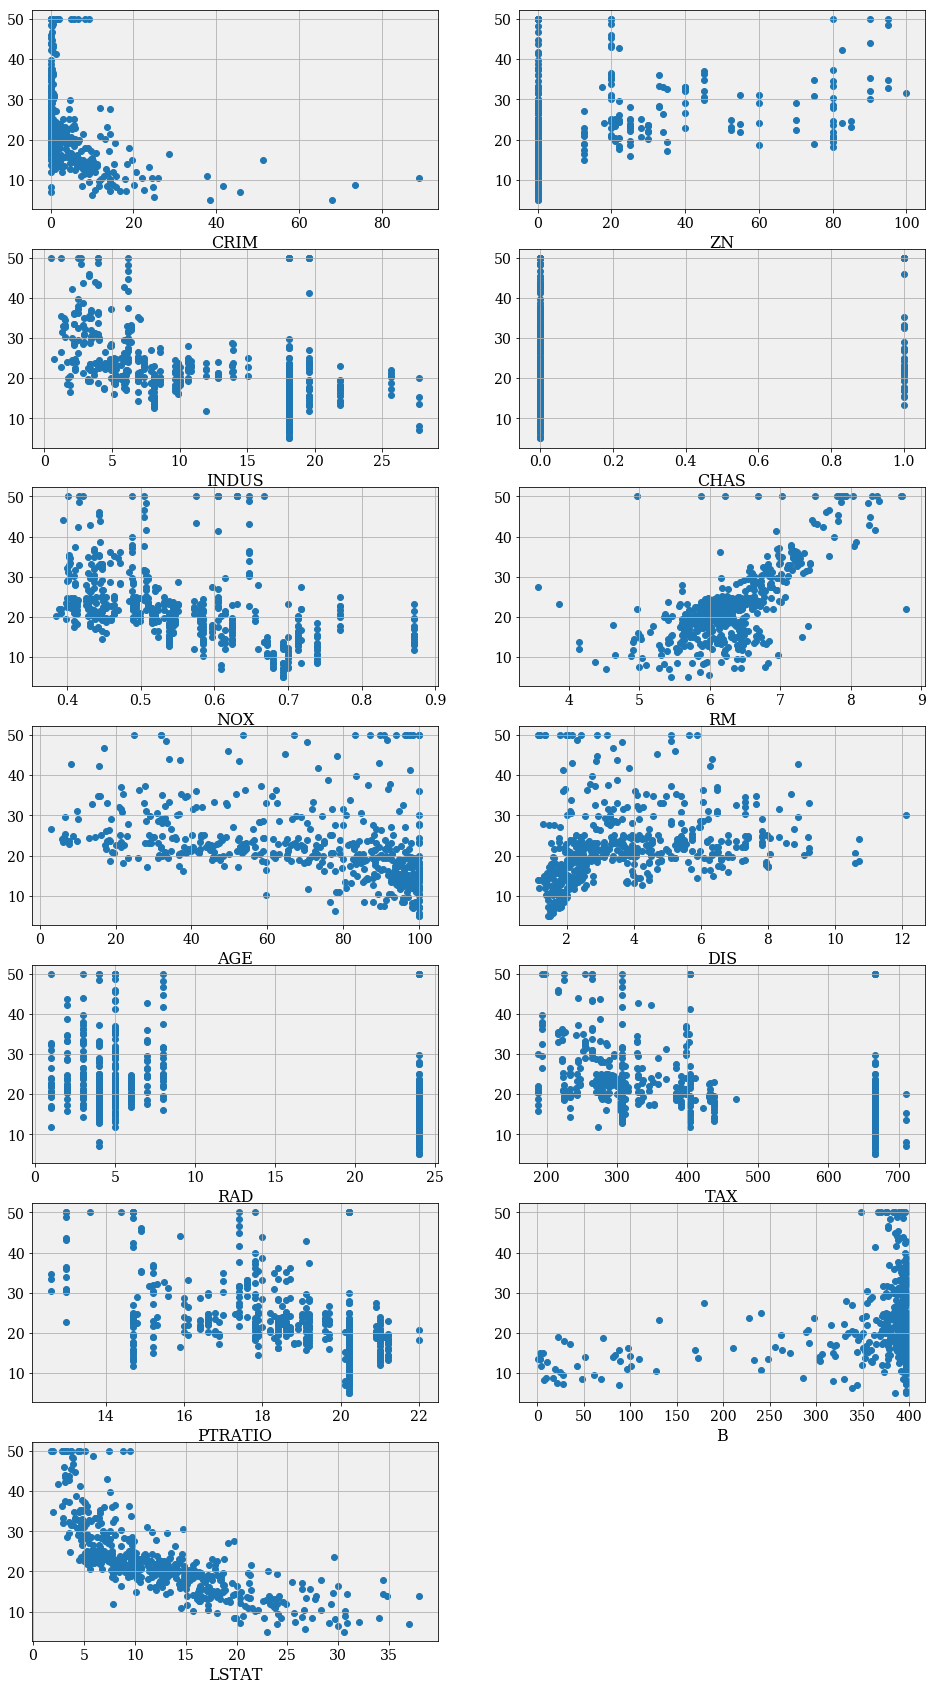

In [121]:
plt.figure(figsize =(16,30))
c=1
for i in X:
    plt.subplot(7,2,c)
    plt.scatter(X[i],Y)
    plt.xlabel(i)
    c+=1

# Further observations
- A transformed crime rate and prices are related

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Ln_CRIM
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-5.064036
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-3.600502
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,-3.601235
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-3.430523
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,-2.672924


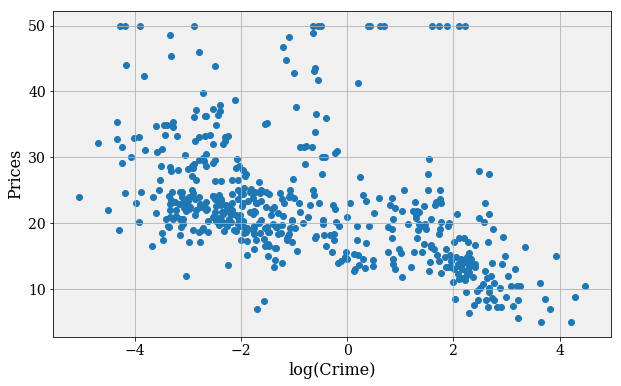

In [172]:
# Further investigation
plt.figure(figsize=(10,6))
plt.scatter(np.log(X['CRIM']),Y)
plt.xlabel('log(Crime)')
plt.ylabel('Prices')

X['Ln_CRIM'] =np.log(X['CRIM'])
X.drop(['CRIM'],axis=1,inplace =True)
X.head()

Text(0, 0.5, 'RAD')

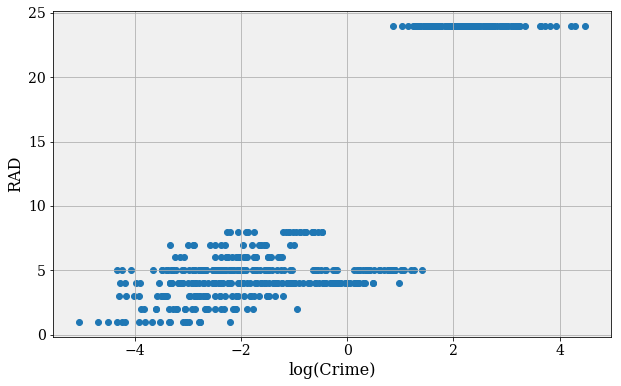

In [126]:
# Crime and Rad
plt.figure(figsize=(10,6))
plt.scatter(np.log(X['CRIM']),X['RAD'])
plt.xlabel('log(Crime)')
plt.ylabel('RAD')

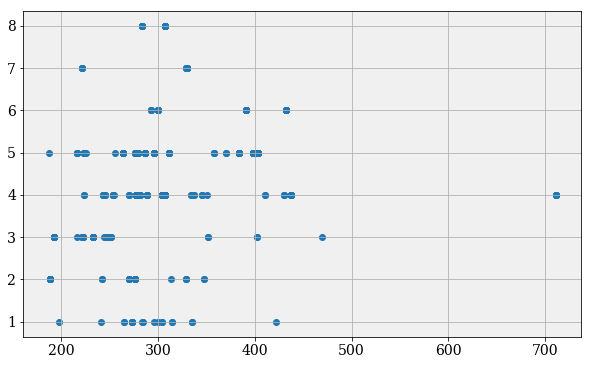

In [156]:
# Tax and B
plt.figure(figsize=(10,6))
plt.scatter(X['TAX'].loc[X['RAD']!=24],X['RAD'].loc[X['RAD']!=24])
# X['RAD']==24

Text(0, 0.5, 'Price')

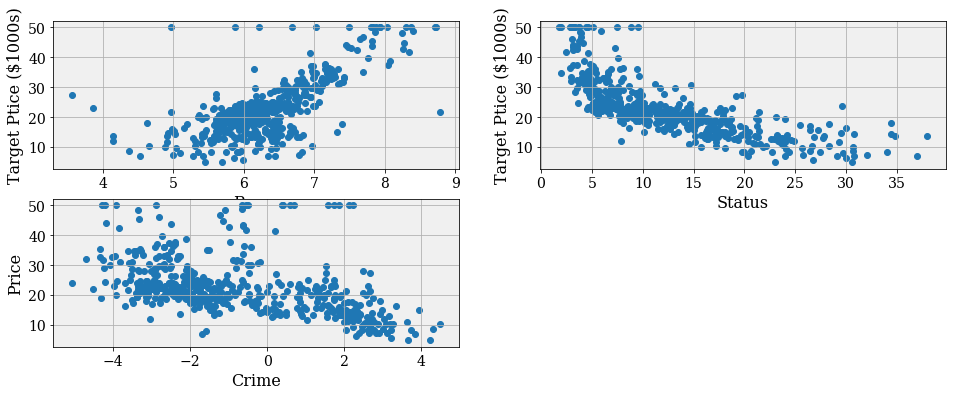

In [120]:
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
plt.scatter(df['RM'],df['target'])
plt.xlabel('Room')
plt.ylabel('Target Ptice ($1000s)')

plt.subplot(2,2,2)
plt.scatter(df['LSTAT'],df['target'])
plt.xlabel('Status')
plt.ylabel('Target Ptice ($1000s)')

plt.subplot(2,2,3)
plt.scatter(np.log(X['CRIM']),Y)
plt.xlabel('Crime')
plt.ylabel('Price')

In [89]:

# Normalize X
X = (X-X.mean())/X.std()
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [173]:
# Linear Regression on whole model

full_model =sm.OLS(Y,X).fit()
results_summary = full_model.summary()
full_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     877.8
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        00:18:08   Log-Likelihood:                -1527.5
No. Observations:                 506   AIC:                             3081.
Df Residuals:                     493   BIC:                             3136.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0458      0.015      3.092      0.002       0.017       0.075
INDUS          0.0019      0.065      0.030      0.976      -0.126       0.130
CHAS           2.9737      0.910      3.270      0.001       1.187       4.761
NOX           -2.7180      3.446     -0.789      0.431      -9.488       4.052
RM             5.9154      0.317     18.676      0.000       5.293       6.538
AGE           -0.0075      0.014     -0.536      0.592      -0.035       0.020
DIS           -0.9121      0.197     -4.630      0.000      -1.299      -0.525
RAD            0.1165      0.079      1.473      0.141      -0.039       0.272
TAX           -0.0093      0.004     -2.356      0.019      -0.017      -0.002
PTRATIO       -0.3936      0.115     -3.437      0.001      -0.619      -0.169
B              0.0158      0.003      5.715      0.000       0.010       0.021
LSTAT         -0.4418      0.051     -8.747      0.000      -0.541      -0.343
Ln_CRIM        0.0500      0.287      0.174      0.862      -0.514       0.614
==============================================================================
Omnibus:                      197.162   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1351.979
Skew:                           1.537   Prob(JB):                    2.64e-294
Kurtosis:                      10.395   Cond. No.                     8.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

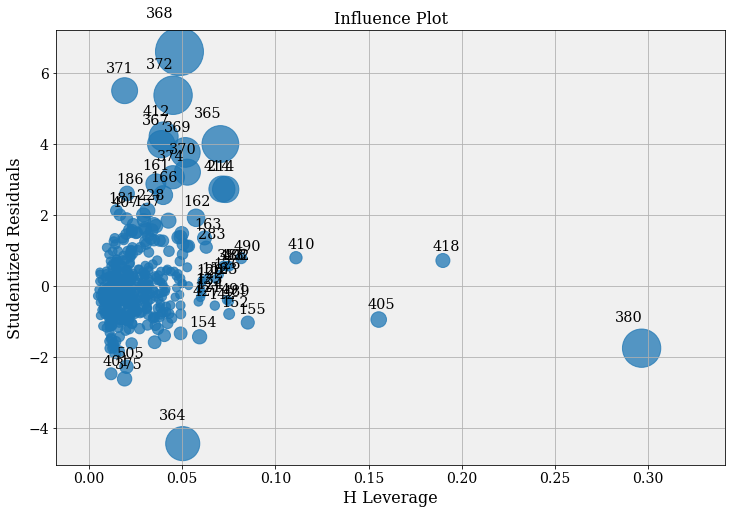

In [107]:
# Influence plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(full_model,  ax=ax, criterion="cooks")

In [101]:
X.loc[360:380,:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
360,0.107934,-0.48724,1.014995,-0.272329,1.858036,0.161348,0.690085,-0.606372,1.659603,1.529413,0.805778,0.195914,-0.681000
361,0.025962,-0.48724,1.014995,-0.272329,1.858036,-0.047870,0.800213,-0.712132,1.659603,1.529413,0.805778,-0.065984,0.215225
362,0.007521,-0.48724,1.014995,-0.272329,1.858036,-1.313140,0.981393,-0.803265,1.659603,1.529413,0.805778,0.264155,-0.344916
363,0.070786,-0.48724,1.014995,3.664771,1.858036,-0.685486,0.725610,-0.897722,1.659603,1.529413,0.805778,-0.039805,0.278241
364,-0.016188,-0.48724,1.014995,3.664771,1.409287,3.551530,0.508905,-0.897722,1.659603,1.529413,0.805778,-0.023266,-1.031088
365,0.109555,-0.48724,1.014995,-0.272329,1.409287,-3.876413,0.686532,-1.036155,1.659603,1.529413,0.805778,-0.021623,-0.774824
366,0.009699,-0.48724,1.014995,-0.272329,1.409287,-1.881016,0.810871,-0.970097,1.659603,1.529413,0.805778,-0.445195,0.188619
367,1.151965,-0.48724,1.014995,-0.272329,0.658496,-3.446592,1.116390,-1.084880,1.659603,1.529413,0.805778,-2.467324,0.094795
368,0.149356,-0.48724,1.014995,-0.272329,0.658496,-1.871054,1.116390,-1.169459,1.659603,1.529413,0.805778,0.206430,-1.315360
369,0.239080,-0.48724,1.014995,3.664771,0.658496,0.566974,1.002708,-1.157967,1.659603,1.529413,0.805778,0.204348,-1.249543


<Figure size 864x1440 with 0 Axes>

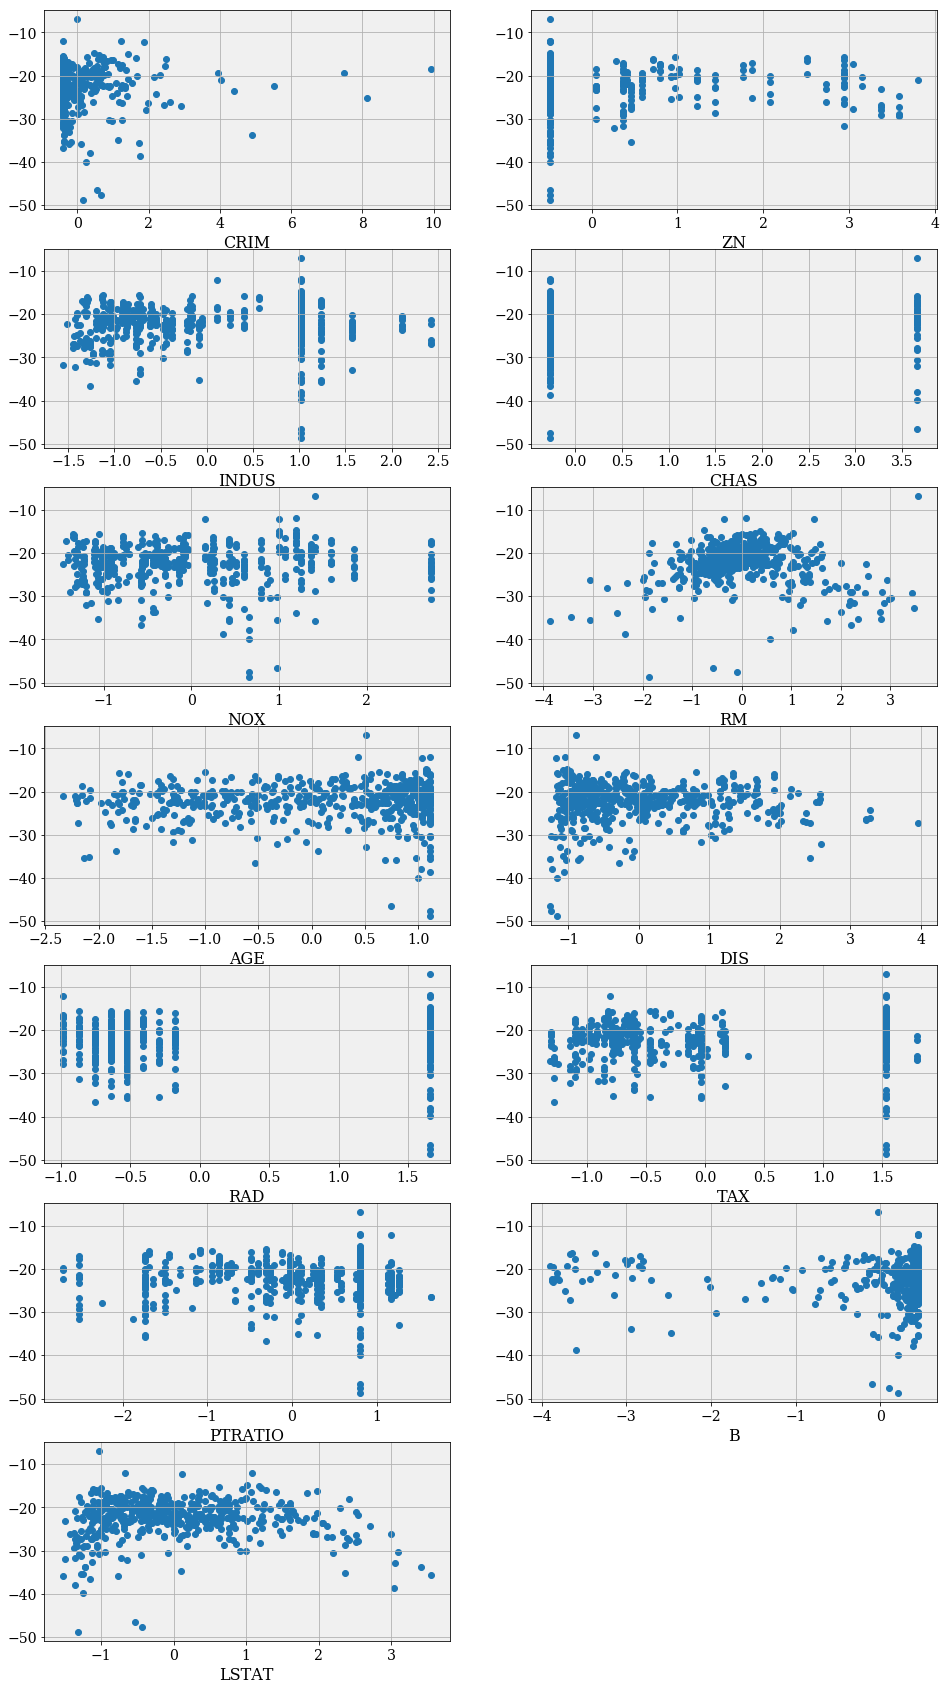

In [91]:
# Error analysis
y_hat = full_model.predict(X)
resid = y_hat - Y
fig = plt.figure(figsize=(12, 20))
c =1
plt.figure(figsize = (16,30))
for ix in X:
        plt.subplot(7,2,c)
        plt.scatter(X[ix],resid)
        c+=1
        plt.xlabel(ix)

# # fig = plt.figure(figsize=(12, 8))
# fig = sm.graphics.plot_ccpr_grid(full_model, fig=fig)
# plt.tight_layout()

In [95]:

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
summary_table= pd.read_html(results_as_html, header=0, index_col=0)[0]
summary_table

,coef,std err,t,P>|t|,[0.025,0.975]
CRIM,-0.9291,1.389,-0.669,0.504,-3.658,1.800
ZN,1.0826,1.573,0.688,0.492,-2.008,4.173
INDUS,0.1410,2.073,0.068,0.946,-3.932,4.214
CHAS,0.6824,1.075,0.635,0.526,-1.430,2.795
NOX,-2.0588,2.175,-0.947,0.344,-6.332,2.214
RM,2.6769,1.443,1.855,0.064,-0.158,5.512
AGE,0.0195,1.827,0.011,0.991,-3.570,3.609
DIS,-3.1071,2.064,-1.506,0.133,-7.162,0.947
RAD,2.6649,2.838,0.939,0.348,-2.912,8.242
TAX,-2.0788,3.114,-0.668,0.505,-8.197,4.039


In [96]:
# Linear regression with one variable missing, as per the t-tests of full-model
idx = summary_table.index[summary_table['P>|t|']>0.05]
idx


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')

In [97]:
# temp =X.drop(idx[0],axis=1)
# temp.head()
for ix in idx:
    print(ix)
    temp = X.drop(ix,axis=1)
    partial_model = sm.OLS(Y,temp).fit()
    print('Model Summary for ', ix)
    print(partial_model.summary())

CRIM
Model Summary for  CRIM
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4.818
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.65e-07
Time:                        23:10:15   Log-Likelihood:                -2305.1
No. Observations:                 506   AIC:                             4634.
Df Residuals:                     494   BIC:                             4685.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.9909  

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
RM
Model Summary for  RM
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     4.541
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           5.70e-07
Time:                        23:10:15   Log-Likelihood:                -2306.6
No. Observations:                 506   AIC:                             4637.
Df Residuals:                     494   BIC:                             4688.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
PTRATIO
Model Summary for  PTRATIO
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     4.656
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.41e-07
Time:                        23:10:15   Log-Likelihood:                -2306.0
No. Observations:                 506   AIC:                             4636.
Df Residuals:                     494   BIC:                             4687.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

In [98]:
temp = X.drop(idx,axis=1)
partial_model =sm.OLS(Y,temp).fit()
partial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     42.47
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.74e-10
Time:                        23:10:56   Log-Likelihood:                -2312.6
No. Observations:                 506   AIC:                             4627.
Df Residuals:                     505   BIC:                             4632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -6.7844      1.041     -6.517      0.000      -8.830      -4.739
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
temp = X.loc[:,["RM","LSTAT"]]
partial_model = sm.OLS(Y,temp).fit()
partial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     25.24
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.58e-11
Time:                        23:09:35   Log-Likelihood:                -2308.9
No. Observations:                 506   AIC:                             4622.
Df Residuals:                     504   BIC:                             4630.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.5797      1.310      2.732      0.007       1.005       6.154
LSTAT         -4.5871      1.310     -3.501      0.001      -7.161      -2.013
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         2.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""